In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import os
import pandas as pd
#import kagglehub

# Download the dataset
path = r"/Users/sumeyahussein/Desktop/fraud"
# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTrain.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

Files in dataset directory: ['fraudTrain_processed.csv', 'fraudTrain_processed2.csv', 'fraudTrain.csv', 'fraudTest.csv']
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks

In [39]:
# Print the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 1296675
Number of Columns: 23


In [40]:
# Count the occurrences of each unique value in the 'is_fraud' column
print(df['is_fraud'].value_counts())

0    1289169
1       7506
Name: is_fraud, dtype: int64


In [41]:
# Show the type of data in each column
data_types = df.dtypes
print("\nData Types:\n", data_types)


Data Types:
 Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [42]:
# Calculate the number of missing values and their percentages for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Create a DataFrame 
missing_df = pd.DataFrame({
    'Missing Data': missing_data,
    'Missing Percentage': missing_percentage
}, index=df.columns)

# Filter out columns with no missing data to focus on relevant features
missing_df_filtered = missing_df[missing_df['Missing Data'] > 0]

# Check if there are any columns with missing data to visualize
if not missing_df_filtered.empty:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=missing_df_filtered.index, y=missing_df_filtered['Missing Percentage'], palette="viridis")

    for i, (value, pct) in enumerate(zip(missing_df_filtered['Missing Data'], missing_df_filtered['Missing Percentage'])):
        ax.text(i, pct, f'{int(value)}', ha='center', va='bottom')

    # Customize plot labels and title
    plt.ylabel('Percentage of Missing Values')
    plt.title('Missing Data Analysis')
    ax.set_xlabel('Features with Missing Values')
    ax.tick_params(axis='x', rotation=90)
    ax.set_yscale('log')  

    plt.show()
else:
    # If no missing data is found, print a message instead of plotting
    print("No missing data found in the dataset.")

No missing data found in the dataset.


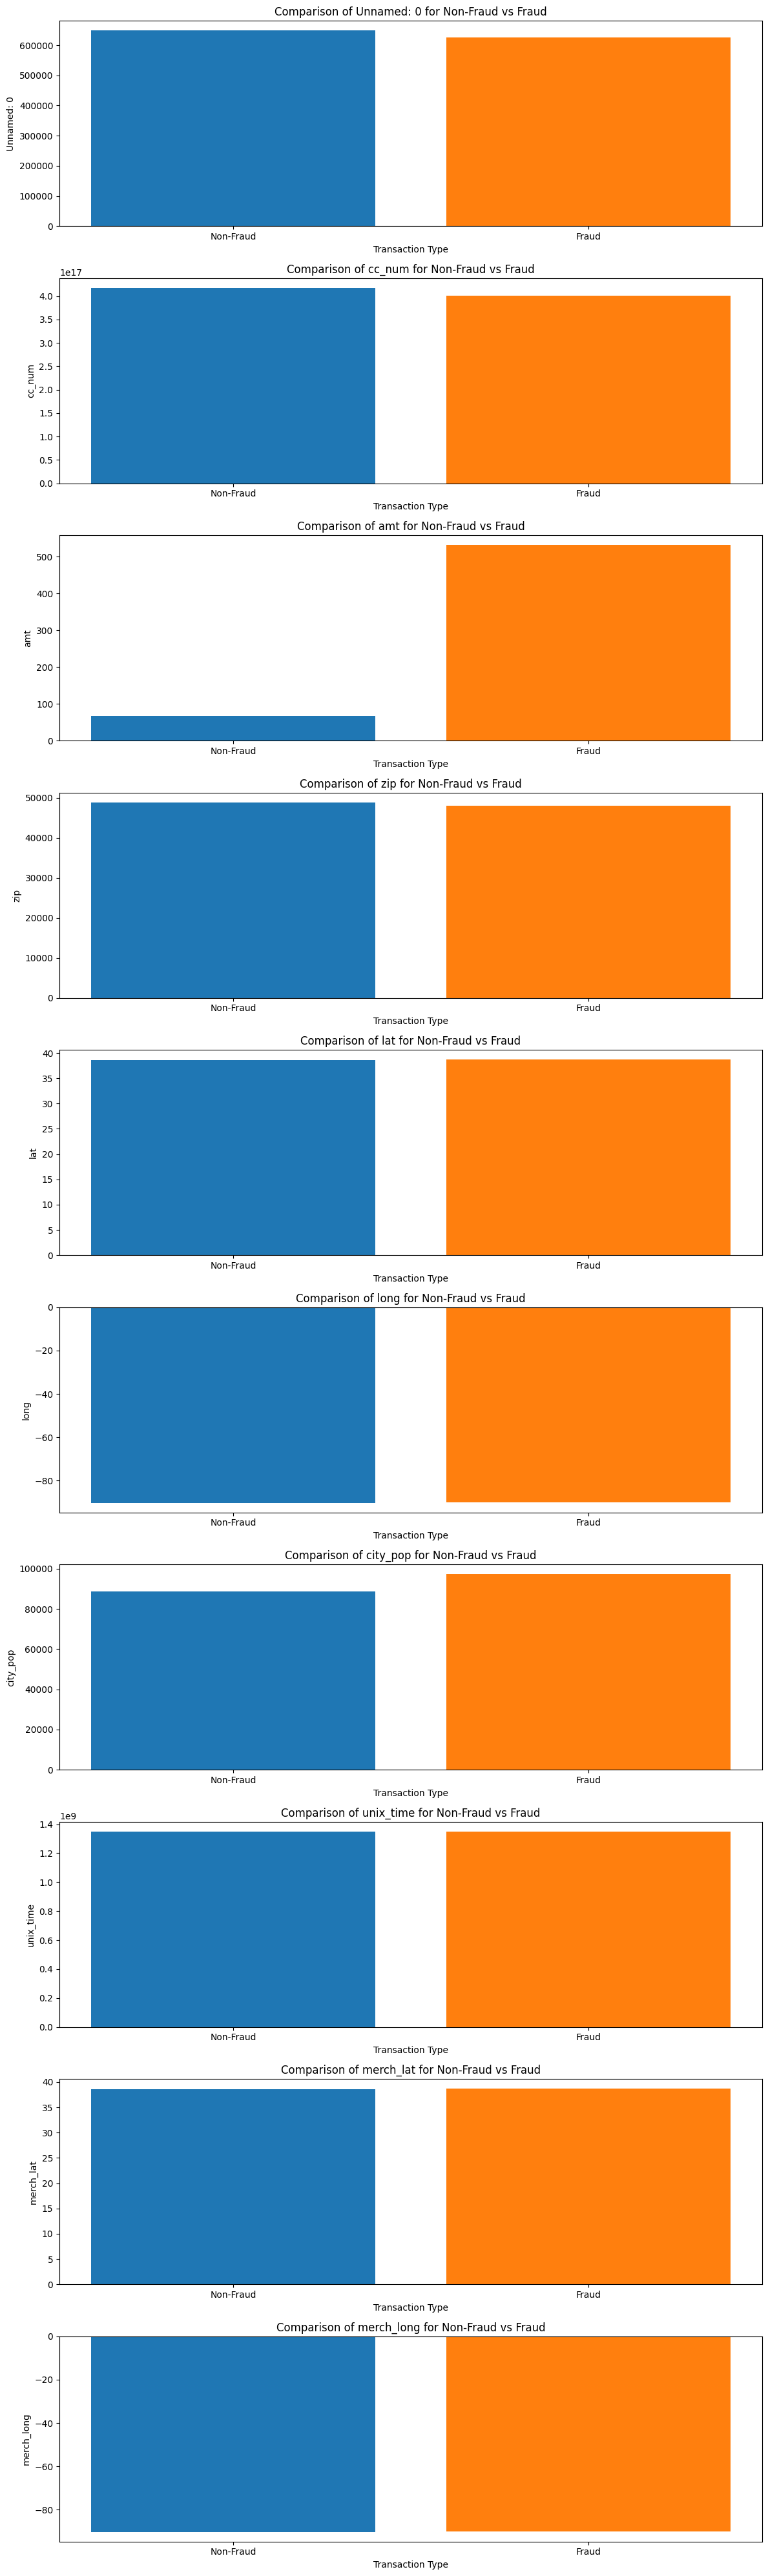

         Unnamed: 0 trans_date_trans_time            cc_num  \
2449           2449   2019-01-02 01:06:37     4613314721966   
2472           2472   2019-01-02 01:47:29   340187018810220   
2523           2523   2019-01-02 03:05:23   340187018810220   
2546           2546   2019-01-02 03:38:03     4613314721966   
2553           2553   2019-01-02 03:55:47   340187018810220   
...             ...                   ...               ...   
1295399     1295399   2020-06-21 01:00:08  3524574586339330   
1295491     1295491   2020-06-21 01:53:35  3524574586339330   
1295532     1295532   2020-06-21 02:16:56  4005676619255478   
1295666     1295666   2020-06-21 03:26:20  3560725013359375   
1295733     1295733   2020-06-21 03:59:46  4005676619255478   

                                     merchant       category      amt  \
2449                   fraud_Rutherford-Mertz    grocery_pos   281.06   
2472         fraud_Jenkins, Hauck and Friesen  gas_transport    11.52   
2523                   f

In [43]:
import matplotlib.pyplot as plt
# Separate the data by is_fraud values
fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]

# Calculate means for numerical features by fraud type, looping over is_fraud
numerical_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'is_fraud']

fraud_means = fraud_df[numerical_columns].mean()
non_fraud_means = non_fraud_df[numerical_columns].mean()

# Plotting the comparisons
fig, ax = plt.subplots(len(numerical_columns), 1, figsize=(12, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns):
    ax[i].bar(['Non-Fraud', 'Fraud'], [non_fraud_means[col], fraud_means[col]], color=['#1f77b4', '#ff7f0e'])
    ax[i].set_title(f'Comparison of {col} for Non-Fraud vs Fraud')
    ax[i].set_ylabel(col)
    ax[i].set_xlabel('Transaction Type')
    
plt.tight_layout()
plt.show()

# Filter rows with is_fraud equal to 1
fraudulent_transactions = df[df['is_fraud'] == 1]

# Display the rows with is_fraud == 1
print(fraudulent_transactions)

In [44]:
# Check if 'is_fraud' column contains only 0 and 1
unique_values = df['is_fraud'].unique()

if set(unique_values) == {0, 1}:
    print("The 'is_fraud' column is in the correct binary format (0 and 1) with no anomalies.")
else:
    print("Anomalies found in 'is_fraud' column:")
    print(f"Unexpected values: {unique_values}")

The 'is_fraud' column is in the correct binary format (0 and 1) with no anomalies.


Unnamed: 0: 0 outliers found.
cc_num: 118122 outliers found.
amt: 62772 outliers found.
zip: 0 outliers found.
lat: 4636 outliers found.
long: 49624 outliers found.
city_pop: 241240 outliers found.
unix_time: 0 outliers found.
merch_lat: 4918 outliers found.
merch_long: 41728 outliers found.
Outliers in column cc_num replaced with median value: 3521417320836166.0
Outliers in column amt replaced with median value: 47.28
Outliers in column lat replaced with median value: 39.3543
Outliers in column long replaced with median value: -87.4769
Outliers in column city_pop replaced with median value: 2456.0
Outliers in column merch_lat replaced with median value: 39.365283000000005
Outliers in column merch_long replaced with median value: -87.440911
170203 rows identified as outliers using Z-score method.
Rows with Z-score outliers have been dropped.


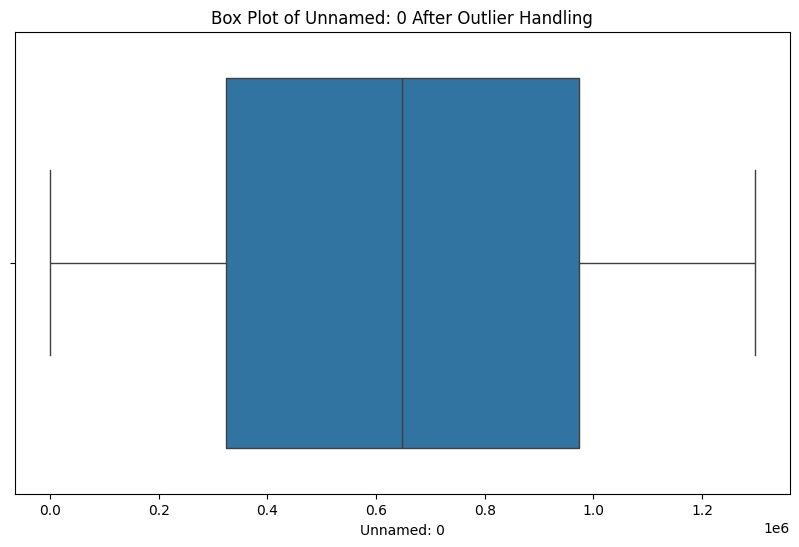

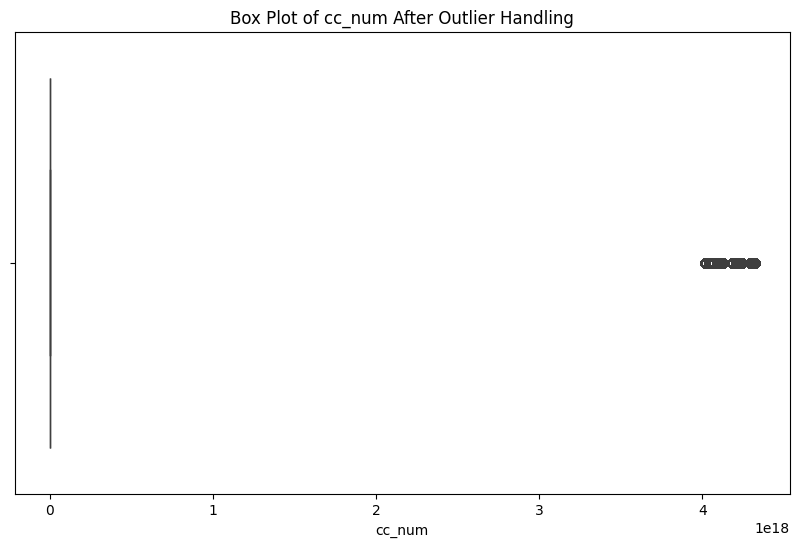

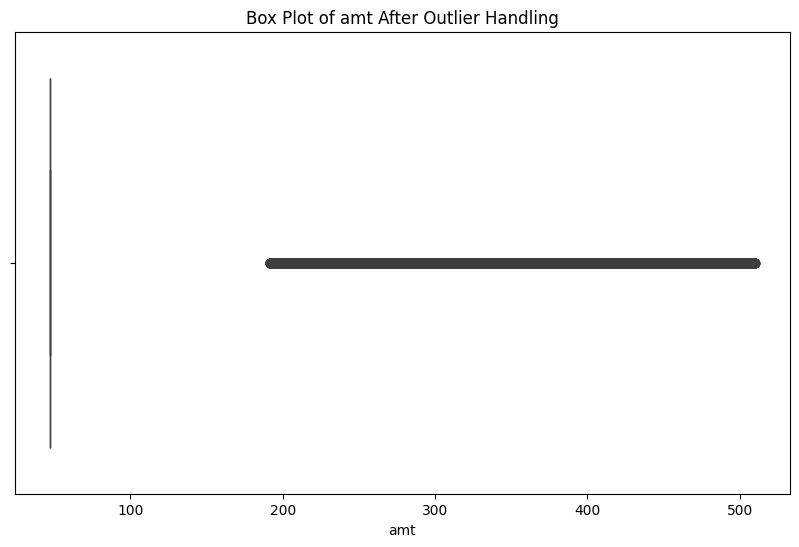

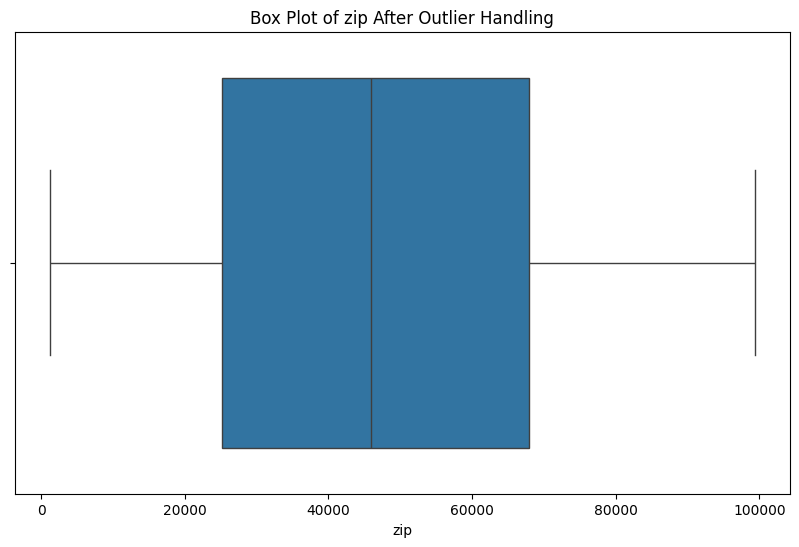

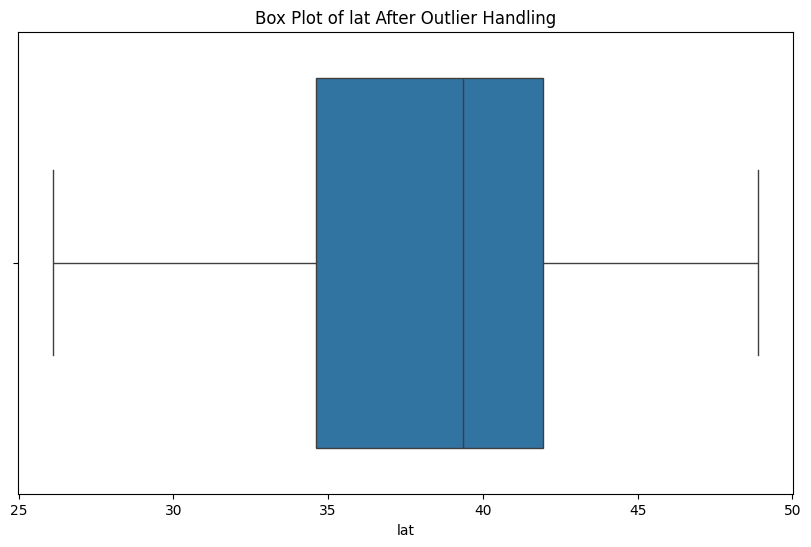

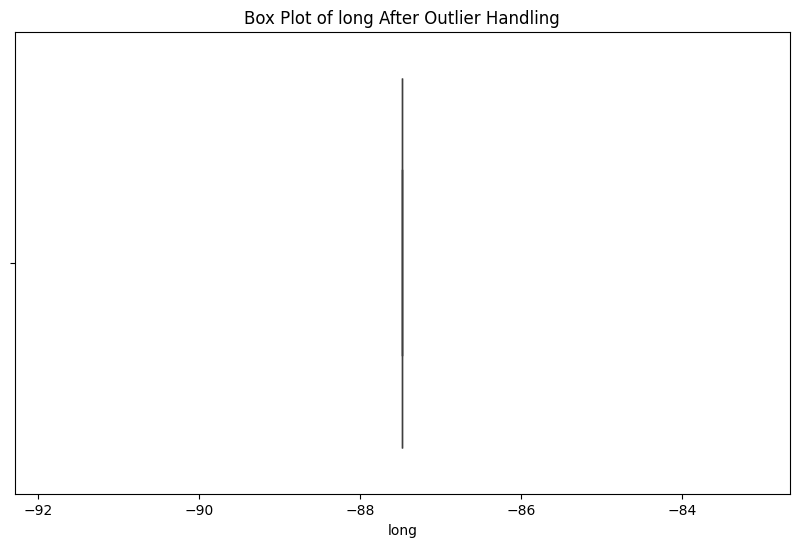

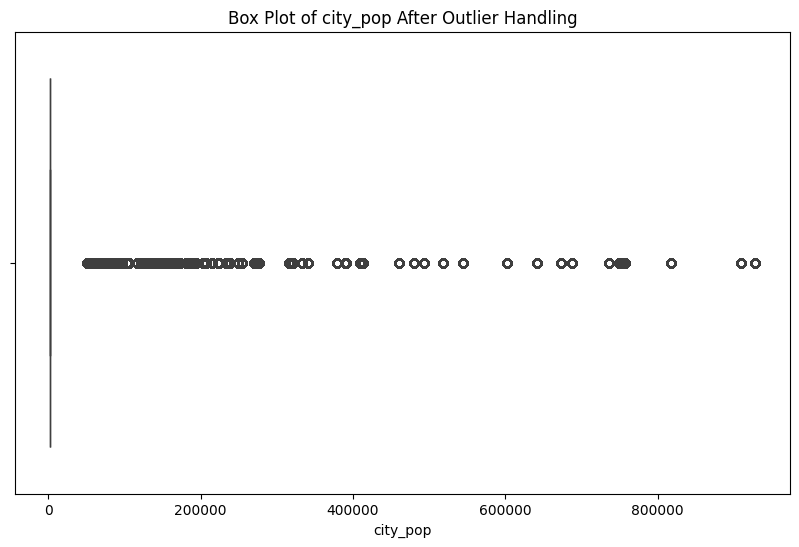

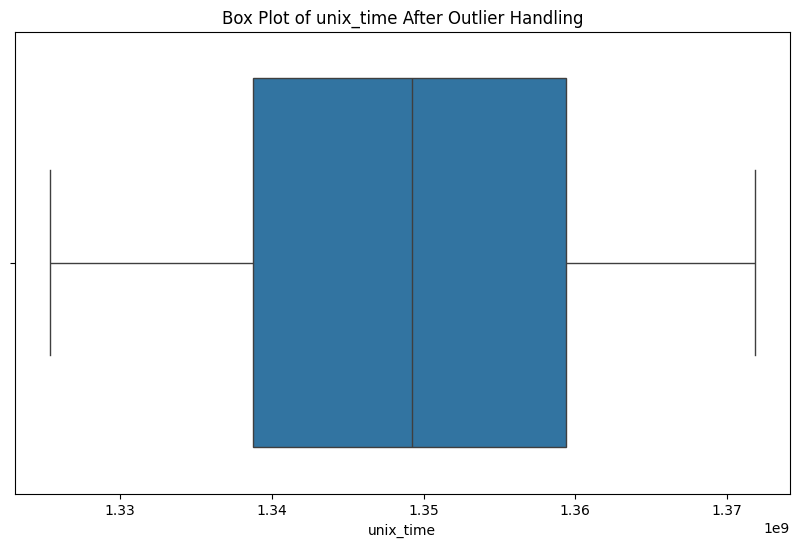

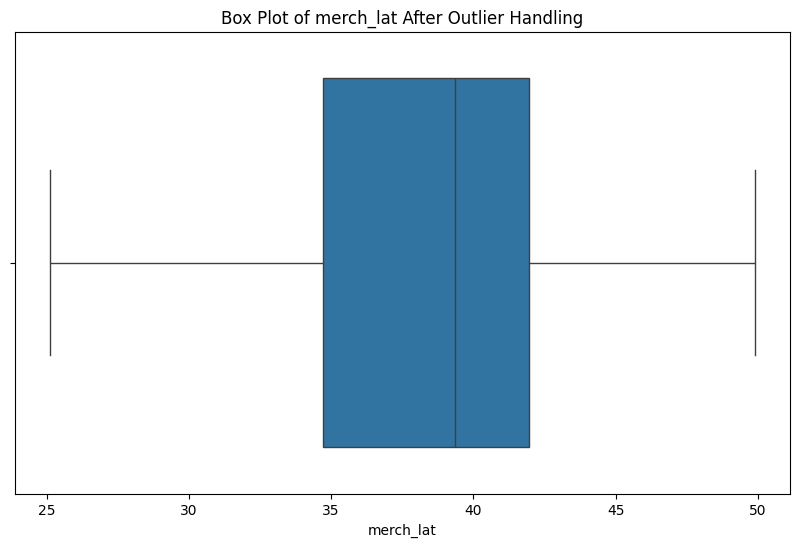

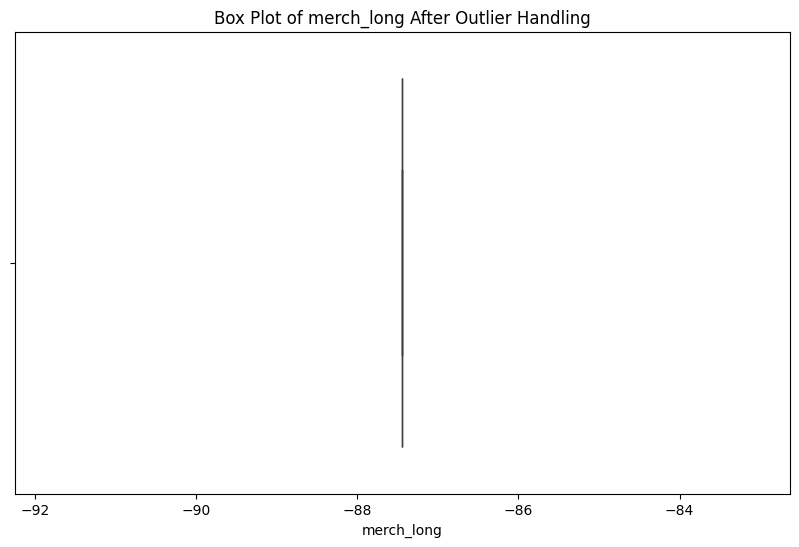

Unique values in trans_date_trans_time:
2020-06-01 01:37:47    4
2020-04-14 23:52:32    3
2019-12-22 21:00:56    3
2019-01-15 06:58:17    3
2019-12-22 02:45:37    3
                      ..
2019-07-13 20:11:45    1
2019-07-13 20:12:00    1
2019-07-13 20:13:02    1
2019-07-13 20:13:37    1
2020-06-21 12:13:37    1
Name: trans_date_trans_time, Length: 1102602, dtype: int64

Unique values in merchant:
fraud_Kilback LLC                       3826
fraud_Cormier LLC                       3127
fraud_Schumm PLC                        3072
fraud_Dickinson Ltd                     2976
fraud_Kuhn LLC                          2962
                                        ... 
fraud_Boyer-Haley                        634
fraud_Little-Gleichner                   624
fraud_Reichert-Weissnat                  622
fraud_Medhurst, Labadie and Gottlieb     618
fraud_Hahn, Douglas and Schowalter       602
Name: merchant, Length: 693, dtype: int64

Unique values in category:
gas_transport     115528
home    

In [45]:
from scipy.stats import zscore
import seaborn as sns


# Load your CSV file into a DataFrame
#df = pd.read_csv('/Users/sumeyahussein/Desktop/fraud/fraudTrain.csv')

# Separate the rows where is_fraud is False
df_no_fraud = df[df['is_fraud'] == 0].copy()

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numerical_columns = df_no_fraud.select_dtypes(include=['float64', 'int64']).columns
outliers_dict = {}

for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        outliers = find_outliers_iqr(df_no_fraud, col)
        outliers_dict[col] = outliers
        print(f"{col}: {len(outliers)} outliers found.")

for col, outliers in outliers_dict.items():
    if not outliers.empty:
        # Strategy: Replace outliers with the median
        median_value = df_no_fraud[col].median()
        df_no_fraud.loc[(df_no_fraud[col] < outliers[col].min()) | (df_no_fraud[col] > outliers[col].max()), col] = median_value
        print(f"Outliers in column {col} replaced with median value: {median_value}")

# Finding outliers with z score
z_scores = df_no_fraud[numerical_columns].apply(zscore)
outliers_z = (z_scores.abs() > 3).any(axis=1)
outlier_rows = df_no_fraud[outliers_z]

if outlier_rows.empty:
    print("No outliers found using Z-score method.")
else:
    print(f"{len(outlier_rows)} rows identified as outliers using Z-score method.")
    # Strategy: Drop rows with Z-score outliers
    df_no_fraud = df_no_fraud[~outliers_z]
    print("Rows with Z-score outliers have been dropped.")

for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df_no_fraud[col])
        plt.title(f"Box Plot of {col} After Outlier Handling")
        plt.show()

categorical_columns = df_no_fraud.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:\n{df_no_fraud[col].value_counts()}\n")

# Combine the processed rows with the rest of the DataFrame
df_combined = pd.concat([df[df['is_fraud'] == 1], df_no_fraud])

# Writing cleaned dataset, free of outliers or with outliers handled, to a CSV file
#df.to_csv("/Users/sumeyahussein/Desktop/fraud/fraudTrain_processed.csv", index=False)

In [46]:
#label encoding before feature selection
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Identify all categorical features in the dataset
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding to each categorical feature
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

# Display the first few rows of the modified categorical columns
print(df[categorical_features].head())


   trans_date_trans_time  merchant  category  first  last  gender  street  \
0                      0       514         8    162    18       0     568   
1                      1       241         4    309   157       0     435   
2                      2       390         0    115   381       1     602   
3                      3       360         2    163   463       1     930   
4                      4       297         9    336   149       1     418   

   city  state  job  dob  trans_num  
0   526     27  370  779      56438  
1   612     47  428  607     159395  
2   468     13  307  302     818703  
3    84     26  328  397     544575  
4   216     45  116  734     831111  


In [47]:
#feature selection using RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Prepare the dataset
X = df.drop(columns=['is_fraud'])  # Drop the target column
y = df['is_fraud']  # Define the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Initialize the model (Logistic Regression in this case)
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the desired estimator
n_features_to_select = 10  # Specify the number of features you want to select
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Identify the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'street', 'city',
       'zip', 'city_pop', 'dob', 'trans_num', 'unix_time'],
      dtype='object')


In [48]:
#feature selection using fishers score
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # Fisher's Score equivalent for classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare the dataset
X = df.drop(columns=['is_fraud'])  # Drop the target column
y = df['is_fraud']  # Define the target column

# Apply Fisher's Score (ANOVA F-value)
# Select top k features; adjust k based on your needs
k = 10  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform the dataset
X_selected = selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("Fisher's Score for Features:")
print(feature_scores)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Top {k} Selected Features:")
print(selected_features)

Fisher's Score for Features:
                  Feature         Score
5                     amt  65576.034604
4                category    529.581979
17                    dob    191.642991
8                  gender     75.721106
19              unix_time     33.432153
1   trans_date_trans_time     29.592297
0              Unnamed: 0     29.472521
6                   first     13.435552
12                    zip      6.060474
15               city_pop      5.915552
10                   city      5.673230
13                    lat      4.651270
20              merch_lat      3.928648
11                  state      3.879209
21             merch_long      3.841981
14                   long      3.839715
9                  street      2.719460
2                  cc_num      1.249028
18              trans_num      0.839017
3                merchant      0.372986
7                    last      0.012013
16                    job      0.011285
Top 10 Selected Features:
Index(['Unnamed: 0', 'tra

In [49]:
#changing float into string for easier feature selection

# Print current data types
data_types = df.dtypes
#print("\nData Types:\n", data_types)

# Convert all float columns to strings
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].astype(str)

# Verify the conversion
print("\nUpdated Data Types:\n", df.dtypes)


Updated Data Types:
 Unnamed: 0                int64
trans_date_trans_time     int64
cc_num                    int64
merchant                  int64
category                  int64
amt                      object
first                     int64
last                      int64
gender                    int64
street                    int64
city                      int64
state                     int64
zip                       int64
lat                      object
long                     object
city_pop                  int64
job                       int64
dob                       int64
trans_num                 int64
unix_time                 int64
merch_lat                object
merch_long               object
is_fraud                  int64
dtype: object


In [50]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Feature Engineering
unused_cols = ['Unnamed: 0', 'first', 'last', 'unix_time', 'gender', 'job', 'dob', 'state', 'trans_num', 'merchant']

     
# Ensure all columns exist in the DataFrame before dropping
unused_cols = [col for col in unused_cols if col in df.columns]
df.drop(columns=unused_cols, inplace=True)

# Check remaining DataFrame structure
df.info()

# Drop the original timestamp column after feature extraction
df.drop(columns=['trans_date_trans_time'], inplace=True)


# Output the first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   trans_date_trans_time  1296675 non-null  int64 
 1   cc_num                 1296675 non-null  int64 
 2   category               1296675 non-null  int64 
 3   amt                    1296675 non-null  object
 4   street                 1296675 non-null  int64 
 5   city                   1296675 non-null  int64 
 6   zip                    1296675 non-null  int64 
 7   lat                    1296675 non-null  object
 8   long                   1296675 non-null  object
 9   city_pop               1296675 non-null  int64 
 10  merch_lat              1296675 non-null  object
 11  merch_long             1296675 non-null  object
 12  is_fraud               1296675 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 128.6+ MB
             cc_num  category     amt  s

In [51]:
print("\n Data Types:\n", df.dtypes)



 Data Types:
 cc_num         int64
category       int64
amt           object
street         int64
city           int64
zip            int64
lat           object
long          object
city_pop       int64
merch_lat     object
merch_long    object
is_fraud       int64
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

print(X_train.dtypes)
print(X_test.dtypes)

Training set size: (1037340, 11)
Test set size: (259335, 11)
cc_num         int64
category       int64
amt           object
street         int64
city           int64
zip            int64
lat           object
long          object
city_pop       int64
merch_lat     object
merch_long    object
dtype: object
cc_num         int64
category       int64
amt           object
street         int64
city           int64
zip            int64
lat           object
long          object
city_pop       int64
merch_lat     object
merch_long    object
dtype: object


In [ ]:
# Decision Tree model

from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#  applying SMOTE to balance the dataset
#  generate synthetic samples and balance the dataset for unbalanced classification problems
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Training Decision Tree model with class_weight='balanced' becuase our dataset is unbalanced
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

# predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # Getting probabilities for the positive class

# calculate metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_dt)  # Calculate AUC


# evaluation and printing statment 
print("Decision Tree\n")

print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision)
print("Decision Tree Recall:", recall)
print("Decision Tree F1 Score:", f1)
print("Decision Tree AUC:", auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree

Decision Tree Accuracy: 0.972070873580504
Decision Tree Precision: 0.9936982473943621
Decision Tree Recall: 0.972070873580504
Decision Tree F1 Score: 0.9814441656897447
Decision Tree AUC: 0.878367476117616

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    257815
           1       0.15      0.78      0.25      1520

    accuracy                           0.97    259335
   macro avg       0.57      0.88      0.62    259335
weighted avg       0.99      0.97      0.98    259335

Confusion Matrix:
 [[250901   6914]
 [   329   1191]]


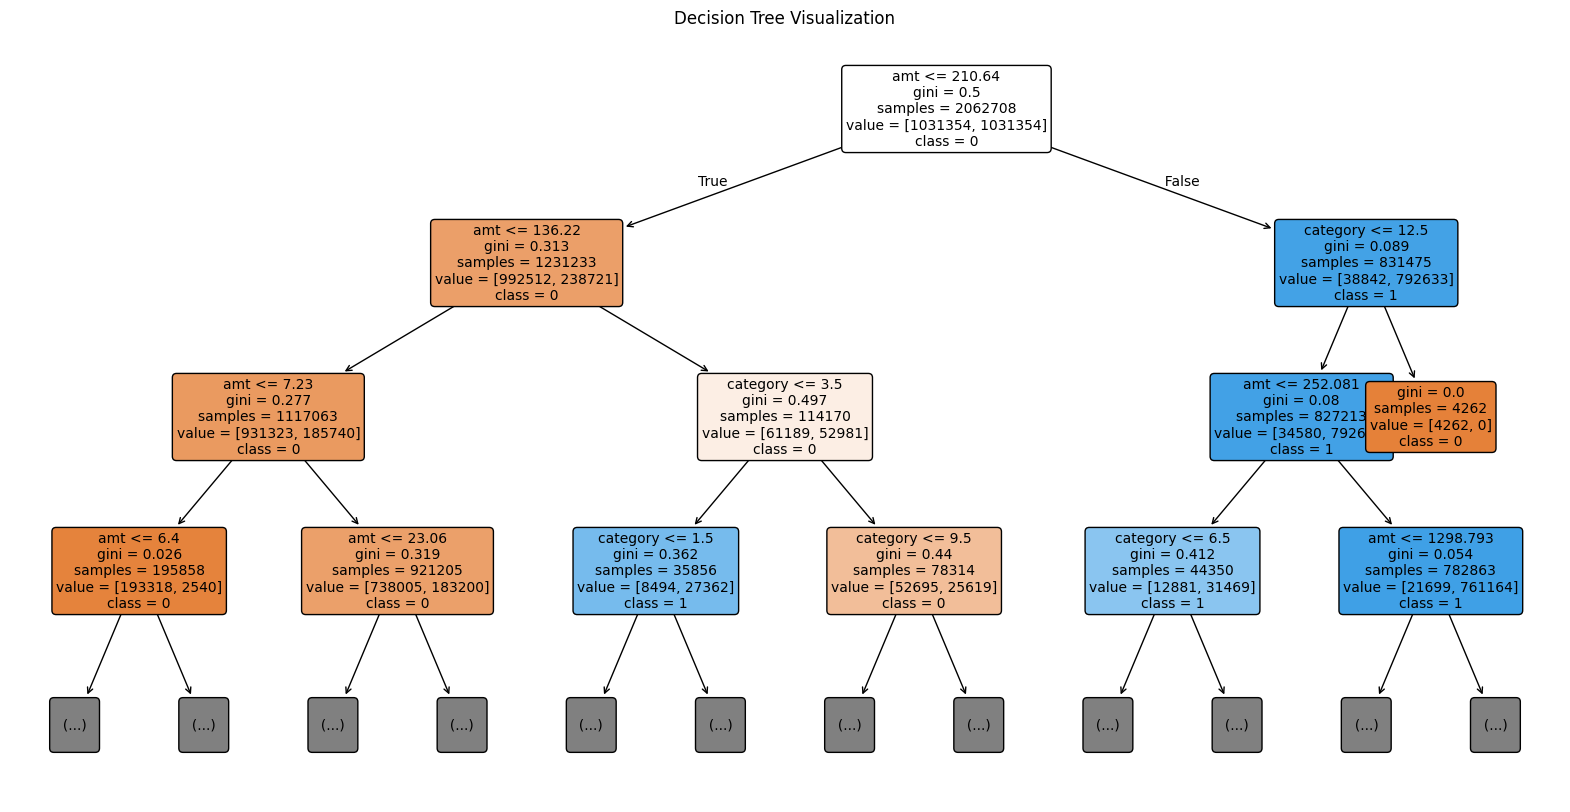

In [54]:
# add visulizations 

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# visualization plot
plt.figure(figsize=(20, 10))  # Set figure size for clarity
plot_tree(
    dt_model,
    feature_names=X_train.columns if isinstance(X_train, pd.DataFrame) else None,
    class_names=[str(c) for c in dt_model.classes_],
    filled=True,  
    rounded=True,  
    fontsize=10, 
    max_depth=3 # Limiting the depth for better readability 
)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
# K-Nearest

from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply SMOTE to balance the dataset
#  generate synthetic samples and balance the dataset for unbalanced classification problems

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Training KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_balanced, y_train_balanced)

# making predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]  # Getting probabilities for the positive class

# Calculating all metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_knn)  # Calculating  AUC

# Evaluation and printing 
print("K-Nearest\n")


print("K-Nearest Accuracy:", accuracy)
print("K-Nearest Precision:", precision)
print("K-Nearest Recall:", recall)
print("K-Nearest F1 Score:", f1)
print("K-Nearest AUC:", auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest

K-Nearest Accuracy: 0.9349914203636224
K-Nearest Precision: 0.9934073454182392
K-Nearest Recall: 0.9349914203636224
K-Nearest F1 Score: 0.9613263754150937
K-Nearest AUC: 0.9026951955553605

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    257815
           1       0.07      0.82      0.13      1520

    accuracy                           0.93    259335
   macro avg       0.53      0.88      0.55    259335
weighted avg       0.99      0.93      0.96    259335

Confusion Matrix:
 [[241233  16582]
 [   277   1243]]


In [ ]:
#  Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
import pandas as pd
import numpy as np

# Scaling the data for Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Logistic Regression model
# using class_weight='balanced' beucase our dataset is unbalanced 
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]  

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_lr)  # Calculating the AUC

# Printing  metrics
print("Logistic Regression\n")

print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Precision:", precision)
print("Logistic Regression Recall:", recall)
print("Logistic Regression F1 Score:", f1)
print("Logistic Regression AUC:", auc)

# Confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression

Logistic Regression Accuracy: 0.9488730792218559
Logistic Regression Precision: 0.993255492166975
Logistic Regression Recall: 0.9488730792218559
Logistic Regression F1 Score: 0.968822310022035
Logistic Regression AUC: 0.8614524031409712

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    257815
           1       0.08      0.78      0.15      1520

    accuracy                           0.95    259335
   macro avg       0.54      0.86      0.56    259335
weighted avg       0.99      0.95      0.97    259335

Confusion Matrix:
 [[244895  12920]
 [   339   1181]]


In [ ]:
# Naive Bayes​

from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Applying SMOTE to balance the dataset
#  generate synthetic samples and balance the dataset for unbalanced classification problems

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)

# making predictions
y_pred_nb = nb_model.predict(X_test)

# Calculating  metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')
auc = roc_auc_score(y_test, y_pred_nb)  # Calculate AUC


# Evaluation
print("Naive Bayes​\n")


print("Naive Bayes​ Accuracy:", accuracy)
print("Naive Bayes​ Precision:", precision)
print("Naive Bayes​ Recall:", recall)
print("Naive Bayes​ F1 Score:", f1)
print("Naive Bayes AUC:", auc)

print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes​

Naive Bayes​ Accuracy: 0.9631557637804384
Naive Bayes​ Precision: 0.9923738676322765
Naive Bayes​ Recall: 0.9631557637804384
Naive Bayes​ F1 Score: 0.9763738917152197
Naive Bayes AUC: 0.7911506185075589

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    257815
           1       0.09      0.62      0.16      1520

    accuracy                           0.96    259335
   macro avg       0.55      0.79      0.57    259335
weighted avg       0.99      0.96      0.98    259335

Confusion Matrix:
 [[248842   8973]
 [   582    938]]


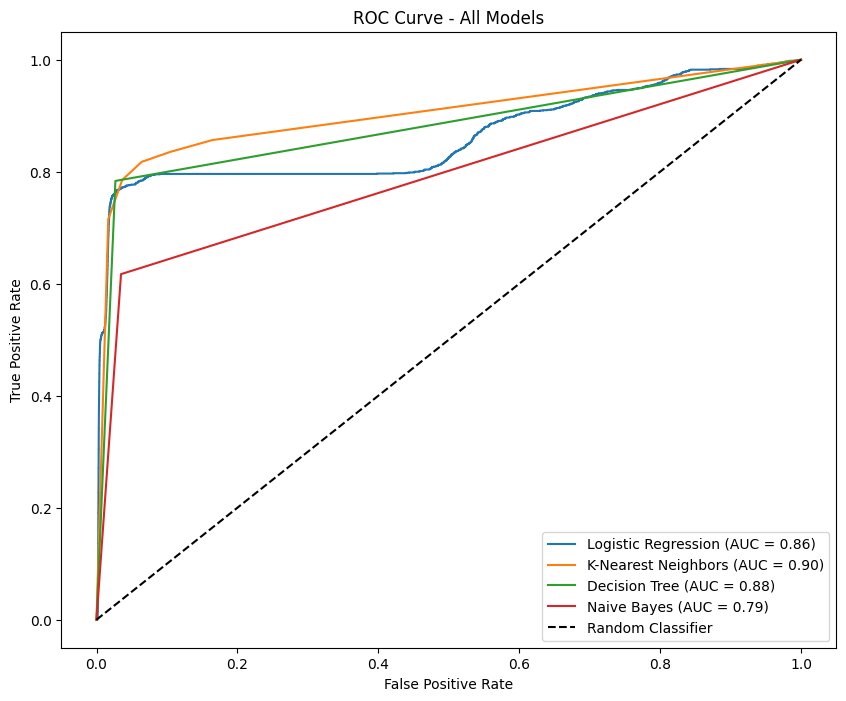

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



# Initialize the plot for the ROC curve
plt.figure(figsize=(10, 8))

# List of models and their predicted probabilities (already trained and predicted previously)
models = [
    ("Logistic Regression", lr_model, y_pred_proba_lr),
    ("K-Nearest Neighbors", knn_model, y_pred_proba_knn),
    ("Decision Tree", dt_model, y_pred_proba_dt),
    ("Naive Bayes", nb_model, y_pred_nb)
]

# Plot ROC curve for each model
for model_name, model, y_pred_proba in models:
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Compute AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()
